#Data Understanding And Visualization

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns; sns.set() 
%matplotlib inline
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')

dataset=pd.read_csv('CLV.csv')
dataset.head()

,INCOME,SPEND
0,233,150
1,250,187
2,204,172
3,236,178
4,354,163


In [2]:
dataset.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
INCOME,303.0,245.273927,48.499412,126.0,211.0,240.0,274.0,417.0
SPEND,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0


Text(0.5, 0, 'Income / spend')

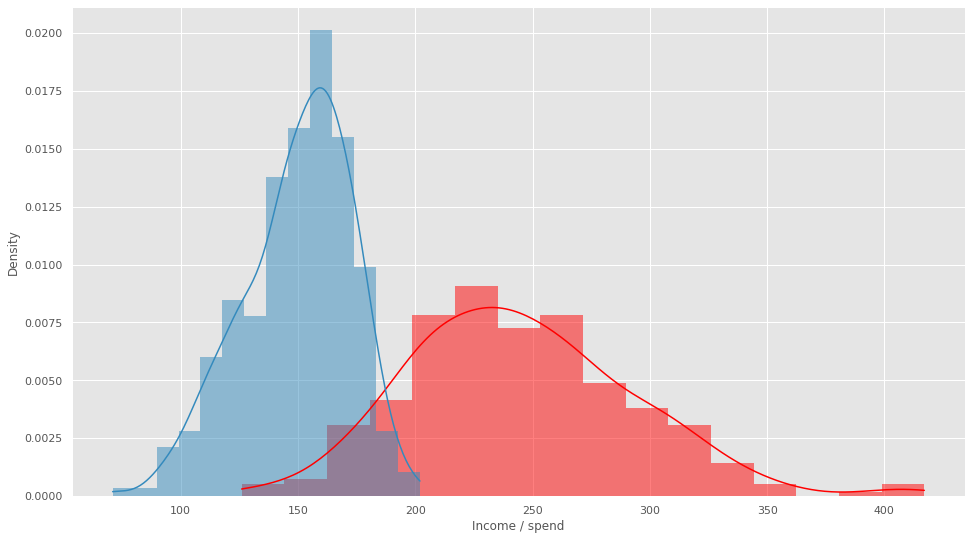

In [7]:
plot_income = sns.histplot(dataset["INCOME"], kde=True, stat="density", linewidth=0, color='red')
plot_spend = sns.histplot(dataset["SPEND"], kde=True, stat="density", linewidth=0 )
plt.xlabel('Income / spend')

[(0.0, 420.0)]

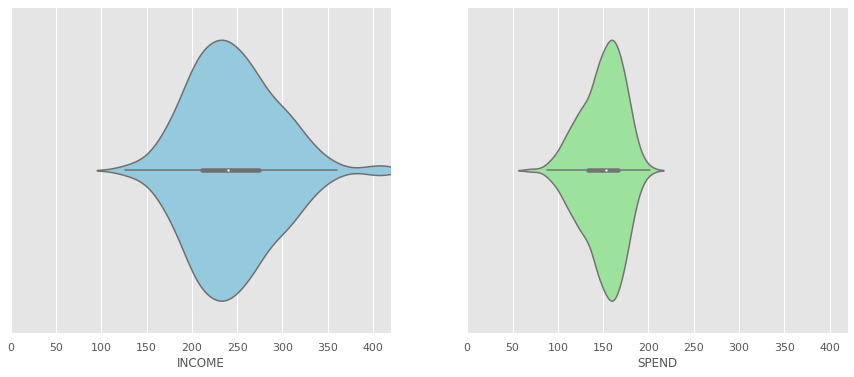

In [6]:
f, axes = plt.subplots(1,2, figsize=(15,6), sharex=True, sharey=True)
v1 = sns.violinplot(data=dataset, x='INCOME', color="skyblue",ax=axes[0])
v2 = sns.violinplot(data=dataset, x='SPEND',color="lightgreen", ax=axes[1])
v1.set(xlim=(0,420))

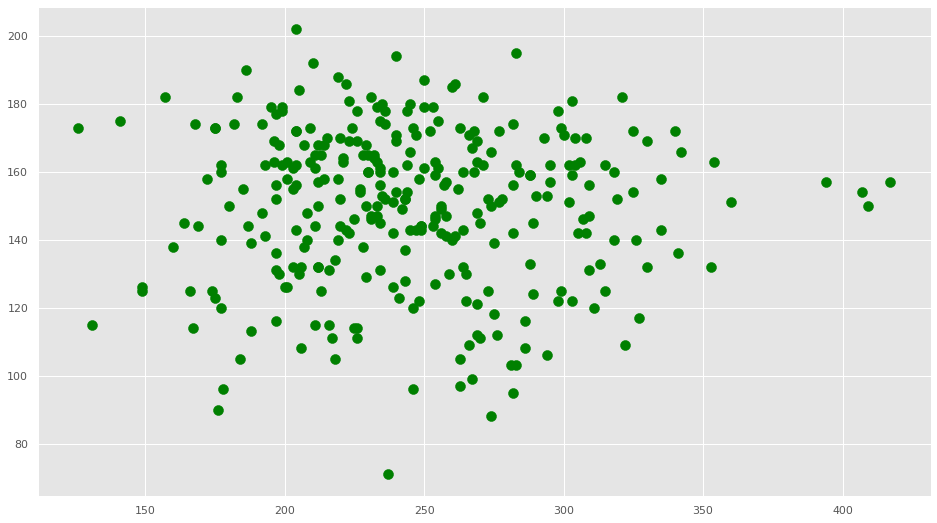

In [ ]:
Income = dataset['INCOME'].values
Spend = dataset['SPEND'].values
X = np.array(list(zip(Income, Spend)))
plt.scatter(Income, Spend, c='green', s=100)

#Deciding on the optimum number of clusters ‘K’

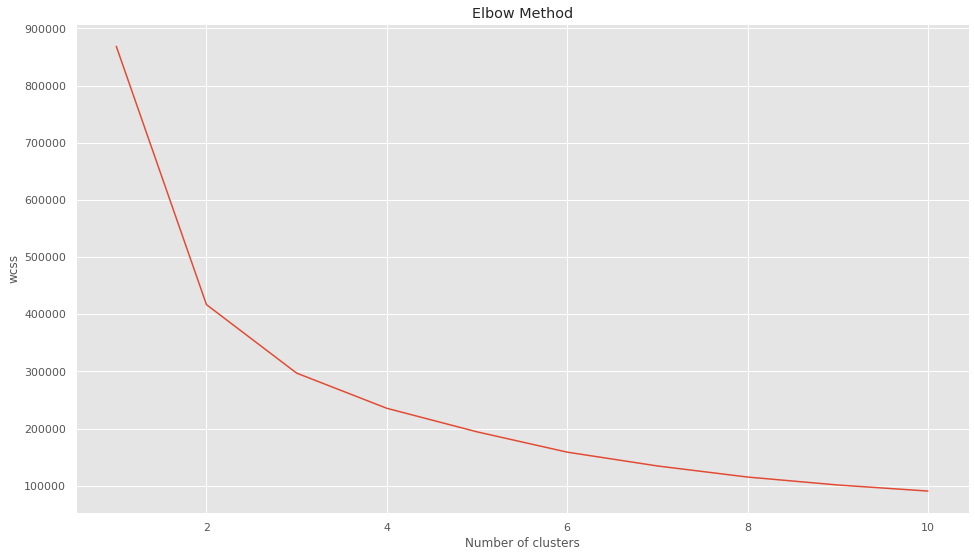

In [9]:
from sklearn.cluster import KMeans
X=dataset.iloc[:,[0,1]].values
wcss = []
for i in range(1,11):
    km=KMeans(n_clusters=i,init='k-means++', max_iter=300, n_init=10, random_state=0)
    km.fit(X)
    wcss.append(km.inertia_)
plt.plot(range(1,11),wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('wcss')
plt.show()

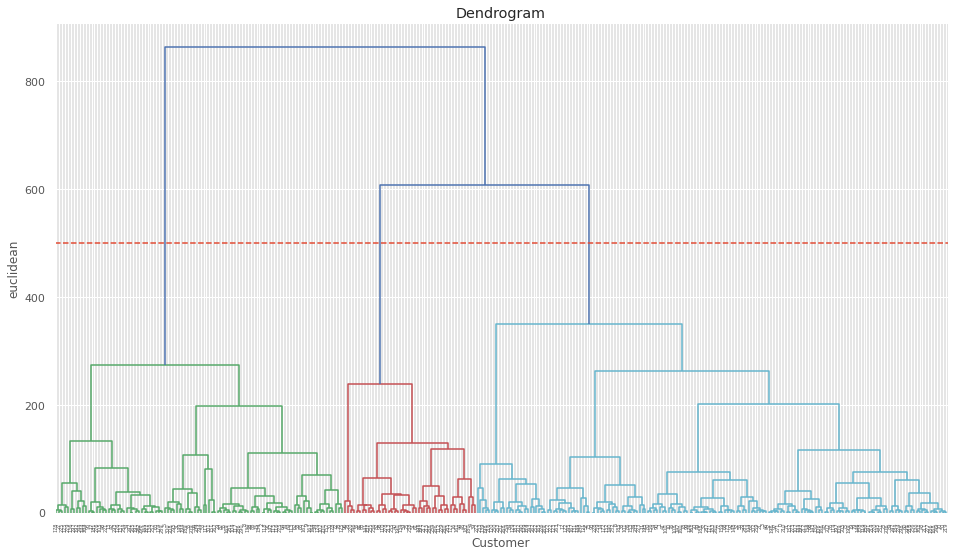

In [15]:
import scipy.cluster.hierarchy as sch
dend=sch.dendrogram(sch.linkage(X, method='ward'))
plt.title("Dendrogram")
plt.axhline(500, linestyle='--')
plt.xlabel('Customer')
plt.ylabel('euclidean')
plt.show()

#Fitting the k-means to the dataset with k=4

In [ ]:
km4=KMeans(n_clusters=4,init='k-means++', max_iter=300, n_init=10, random_state=0)
y_means = km4.fit_predict(X)

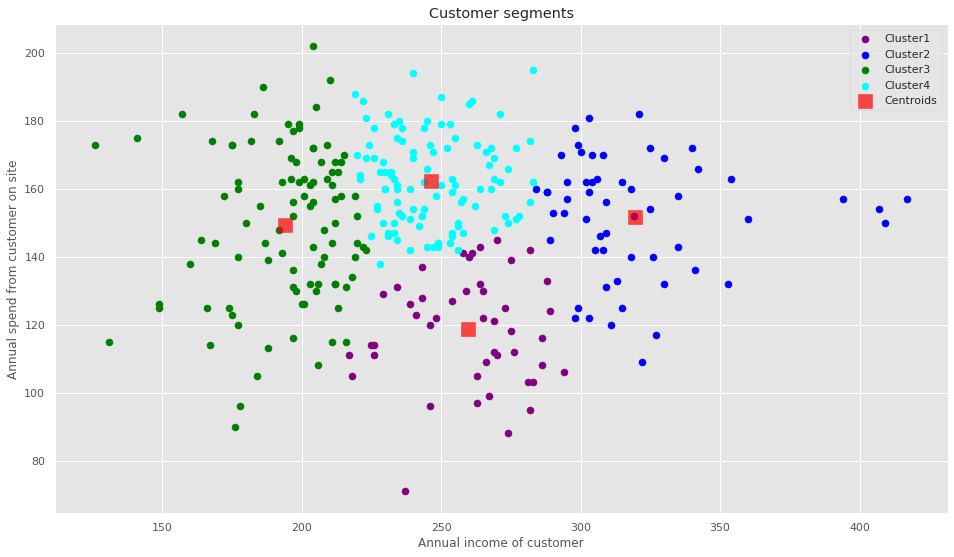

In [ ]:
plt.scatter(X[y_means==0,0],X[y_means==0,1],s=50, c='purple',label='Cluster1')
plt.scatter(X[y_means==1,0],X[y_means==1,1],s=50, c='blue',label='Cluster2')
plt.scatter(X[y_means==2,0],X[y_means==2,1],s=50, c='green',label='Cluster3')
plt.scatter(X[y_means==3,0],X[y_means==3,1],s=50, c='cyan',label='Cluster4')
plt.scatter(km4.cluster_centers_[:,0], km4.cluster_centers_[:,1],s=200,marker='s', c='red', alpha=0.7, label='Centroids')
plt.title('Customer segments')
plt.xlabel('Annual income of customer')
plt.ylabel('Annual spend from customer on site')
plt.legend()
plt.show()

#Fitting Hierarchical Clustering to the dataset with k=3

In [12]:
from sklearn.cluster import AgglomerativeClustering
hc=AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward' )
y_hc = hc.fit_predict(X)

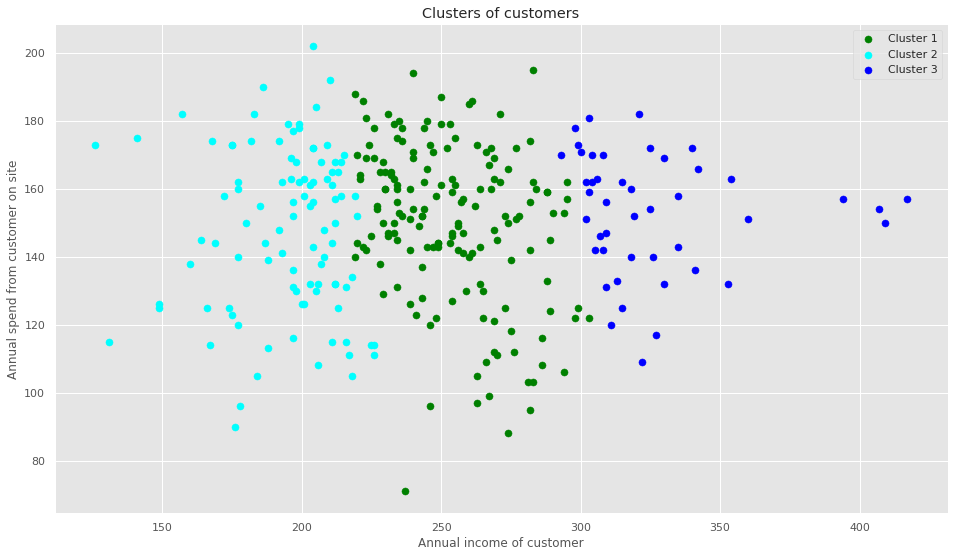

In [14]:
plt.scatter(X[y_hc == 0, 0], X[y_hc == 0, 1], s = 50, c = 'green', label = 'Cluster 1')
plt.scatter(X[y_hc == 1, 0], X[y_hc == 1, 1], s = 50, c = 'cyan', label = 'Cluster 2')
plt.scatter(X[y_hc == 2, 0], X[y_hc == 2, 1], s = 50, c = 'blue', label = 'Cluster 3')

plt.title('Clusters of customers')
plt.xlabel('Annual income of customer')
plt.ylabel('Annual spend from customer on site')
plt.legend()
plt.show()

#Fitting the k-means to the dataset with k=6

In [ ]:
km4=KMeans(n_clusters=6,init='k-means++', max_iter=300, n_init=10, random_state=0)
y_means = km4.fit_predict(X)

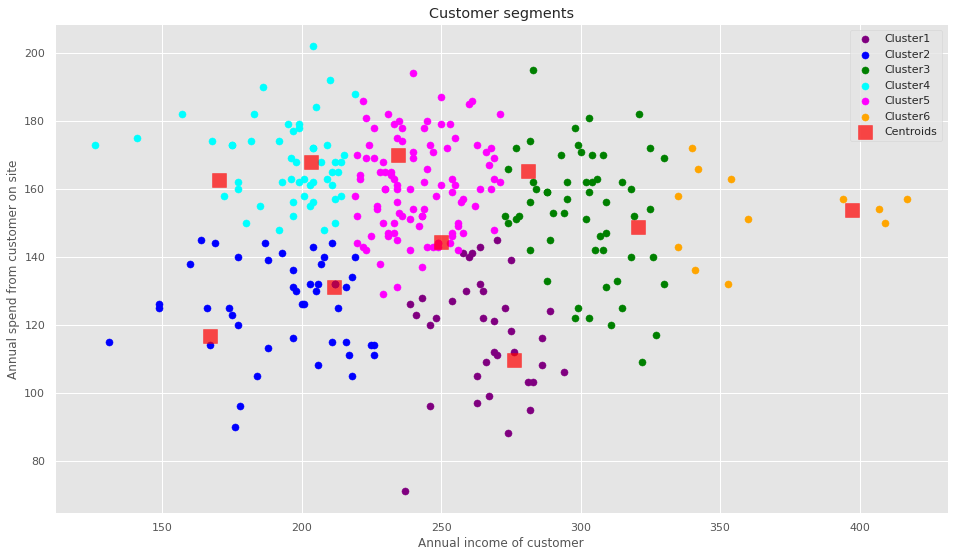

In [ ]:
plt.scatter(X[y_means==0,0],X[y_means==0,1],s=50, c='purple',label='Cluster1')
plt.scatter(X[y_means==1,0],X[y_means==1,1],s=50, c='blue',label='Cluster2')
plt.scatter(X[y_means==2,0],X[y_means==2,1],s=50, c='green',label='Cluster3')
plt.scatter(X[y_means==3,0],X[y_means==3,1],s=50, c='cyan',label='Cluster4')
plt.scatter(X[y_means==4,0],X[y_means==4,1],s=50, c='magenta',label='Cluster5')
plt.scatter(X[y_means==5,0],X[y_means==5,1],s=50, c='orange',label='Cluster6')

plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1],s=200,marker='s', c='red', alpha=0.7, label='Centroids')
plt.title('Customer segments')
plt.xlabel('Annual income of customer')
plt.ylabel('Annual spend from customer on site')
plt.legend()
plt.show()